In [1]:
import networkx as nx
import matplotlib.pyplot as plt

<img src="map.png" alt="map" width="450"/>

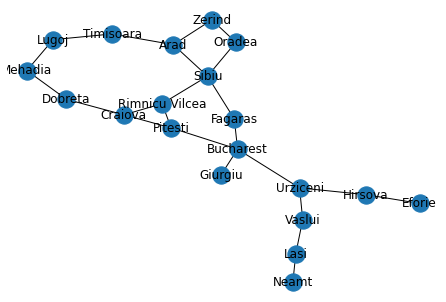

In [2]:
# Build the graph as depicted above

nodes = [
    "Arad",
    "Timisoara",
    "Zerind",
    "Oradea",
    "Sibiu",
    "Fagaras",
    "Bucharest",
    "Rimnicu Vilcea",
    "Lugoj",
    "Mehadia",
    "Dobreta",
    "Craiova",
    "Pitesti",
    "Giurgiu",
    "Urziceni",
    "Hirsova",
    "Eforie",
    "Vaslui",
    "Lasi",
    "Neamt"
]

edges = [
    ('Arad', 'Timisoara', {'weight':118}),
    ('Lugoj', 'Timisoara', {'weight':111}),
    ('Lugoj', 'Mehadia', {'weight':70}),
    ('Dobreta', 'Mehadia', {'weight':75}),
    ('Dobreta', 'Craiova', {'weight':120}),
    ('Rimnicu Vilcea', 'Craiova', {'weight':146}),
    ('Pitesti', 'Craiova', {'weight':138}),
    ('Arad', 'Zerind', {'weight':75}),
    ('Arad', 'Sibiu', {'weight':140}),
    ('Zerind', 'Oradea', {'weight': 71}),
    ('Oradea', 'Sibiu', {'weight': 71}),
    ('Sibiu', 'Fagaras', {'weight': 99}),
    ('Sibiu', 'Rimnicu Vilcea', {'weight': 80}),
    ('Fagaras', 'Bucharest', {'weight': 211}),
    ('Rimnicu Vilcea', 'Pitesti', {'weight': 97}),
    ('Pitesti', 'Bucharest', {'weight': 101}),
    ('Giurgiu', 'Bucharest', {'weight': 90}),
    ('Urziceni', 'Bucharest', {'weight': 85}),
    ('Urziceni', 'Hirsova', {'weight': 98}),
    ('Eforie', 'Hirsova', {'weight': 86}),
    ('Urziceni', 'Vaslui', {'weight': 142}),
    ('Lasi', 'Vaslui', {'weight': 92}),
    ('Lasi', 'Neamt', {'weight': 87}),
]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Uncomment below to display edge weights
# edge_labels = dict([((n1, n2), G[n1][n2]['weight']) for n1, n2 in G.edges])
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# plt.show()

In [3]:
def the_other(tup, element):
    # get the other element in the tuple
    tmp = list(tup)
    tmp.remove(element)
    return tmp[0]

def action():
    # generate actions for each state in the graph
    res = {}
    nodes = list(G.nodes)
    edges = list(G.edges)
    for n in nodes:
        actions = []
        for e in edges:
            if n in e:
                actions.append(e)
        res[n] = actions
    return res

for n,actions in action().items():
    print(f'In({n}) : {list(map(lambda tup : "Go("+the_other(tup, n)+")", actions))}')

In(Arad) : ['Go(Timisoara)', 'Go(Zerind)', 'Go(Sibiu)']
In(Timisoara) : ['Go(Arad)', 'Go(Lugoj)']
In(Zerind) : ['Go(Arad)', 'Go(Oradea)']
In(Oradea) : ['Go(Zerind)', 'Go(Sibiu)']
In(Sibiu) : ['Go(Arad)', 'Go(Oradea)', 'Go(Fagaras)', 'Go(Rimnicu Vilcea)']
In(Fagaras) : ['Go(Sibiu)', 'Go(Bucharest)']
In(Bucharest) : ['Go(Fagaras)', 'Go(Pitesti)', 'Go(Giurgiu)', 'Go(Urziceni)']
In(Rimnicu Vilcea) : ['Go(Sibiu)', 'Go(Craiova)', 'Go(Pitesti)']
In(Lugoj) : ['Go(Timisoara)', 'Go(Mehadia)']
In(Mehadia) : ['Go(Lugoj)', 'Go(Dobreta)']
In(Dobreta) : ['Go(Mehadia)', 'Go(Craiova)']
In(Craiova) : ['Go(Rimnicu Vilcea)', 'Go(Dobreta)', 'Go(Pitesti)']
In(Pitesti) : ['Go(Bucharest)', 'Go(Rimnicu Vilcea)', 'Go(Craiova)']
In(Giurgiu) : ['Go(Bucharest)']
In(Urziceni) : ['Go(Bucharest)', 'Go(Hirsova)', 'Go(Vaslui)']
In(Hirsova) : ['Go(Urziceni)', 'Go(Eforie)']
In(Eforie) : ['Go(Hirsova)']
In(Vaslui) : ['Go(Urziceni)', 'Go(Lasi)']
In(Lasi) : ['Go(Vaslui)', 'Go(Neamt)']
In(Neamt) : ['Go(Lasi)']


In [4]:
def result(state, action):
    # the transition model (a function) for this problem
    # a state is represented as a string
    # an action is represented as a tuple
    if state not in action:
        raise Error("Not a valid combination")
    
    return the_other(action, state)

def state_repr(state):
    return f'In({state})'

def action_repr(state, action):
    return f'Go({the_other(action, state)})'

for state, actions in action().items():
    for act in actions:
        print(f'RESULT({state_repr(state)}, {action_repr(state, act)}) = {state_repr(result(state,act))}')

RESULT(In(Arad), Go(Timisoara)) = In(Timisoara)
RESULT(In(Arad), Go(Zerind)) = In(Zerind)
RESULT(In(Arad), Go(Sibiu)) = In(Sibiu)
RESULT(In(Timisoara), Go(Arad)) = In(Arad)
RESULT(In(Timisoara), Go(Lugoj)) = In(Lugoj)
RESULT(In(Zerind), Go(Arad)) = In(Arad)
RESULT(In(Zerind), Go(Oradea)) = In(Oradea)
RESULT(In(Oradea), Go(Zerind)) = In(Zerind)
RESULT(In(Oradea), Go(Sibiu)) = In(Sibiu)
RESULT(In(Sibiu), Go(Arad)) = In(Arad)
RESULT(In(Sibiu), Go(Oradea)) = In(Oradea)
RESULT(In(Sibiu), Go(Fagaras)) = In(Fagaras)
RESULT(In(Sibiu), Go(Rimnicu Vilcea)) = In(Rimnicu Vilcea)
RESULT(In(Fagaras), Go(Sibiu)) = In(Sibiu)
RESULT(In(Fagaras), Go(Bucharest)) = In(Bucharest)
RESULT(In(Bucharest), Go(Fagaras)) = In(Fagaras)
RESULT(In(Bucharest), Go(Pitesti)) = In(Pitesti)
RESULT(In(Bucharest), Go(Giurgiu)) = In(Giurgiu)
RESULT(In(Bucharest), Go(Urziceni)) = In(Urziceni)
RESULT(In(Rimnicu Vilcea), Go(Sibiu)) = In(Sibiu)
RESULT(In(Rimnicu Vilcea), Go(Craiova)) = In(Craiova)
RESULT(In(Rimnicu Vilcea), Go(

In [5]:
def print_solution(path):
    # print the given solultion (list of nodes on the path)
    prev_node = 'Arad'
    cost = 0
    res = ''
    
    for n in path:
        if n == 'Arad': 
            continue
        cost += G[prev_node][n]['weight']
        prev_node = n
        res += f'Go({n})' + ' -> '
    
    print(str(cost) + ": " + res[0:-4])

solutions = nx.all_simple_paths(G, source='Arad', target='Bucharest')

for sol in solutions:
    print_solution(sol)

1030: Go(Timisoara) -> Go(Lugoj) -> Go(Mehadia) -> Go(Dobreta) -> Go(Craiova) -> Go(Rimnicu Vilcea) -> Go(Sibiu) -> Go(Fagaras) -> Go(Bucharest)
838: Go(Timisoara) -> Go(Lugoj) -> Go(Mehadia) -> Go(Dobreta) -> Go(Craiova) -> Go(Rimnicu Vilcea) -> Go(Pitesti) -> Go(Bucharest)
1119: Go(Timisoara) -> Go(Lugoj) -> Go(Mehadia) -> Go(Dobreta) -> Go(Craiova) -> Go(Pitesti) -> Go(Rimnicu Vilcea) -> Go(Sibiu) -> Go(Fagaras) -> Go(Bucharest)
733: Go(Timisoara) -> Go(Lugoj) -> Go(Mehadia) -> Go(Dobreta) -> Go(Craiova) -> Go(Pitesti) -> Go(Bucharest)
527: Go(Zerind) -> Go(Oradea) -> Go(Sibiu) -> Go(Fagaras) -> Go(Bucharest)
682: Go(Zerind) -> Go(Oradea) -> Go(Sibiu) -> Go(Rimnicu Vilcea) -> Go(Craiova) -> Go(Pitesti) -> Go(Bucharest)
495: Go(Zerind) -> Go(Oradea) -> Go(Sibiu) -> Go(Rimnicu Vilcea) -> Go(Pitesti) -> Go(Bucharest)
450: Go(Sibiu) -> Go(Fagaras) -> Go(Bucharest)
605: Go(Sibiu) -> Go(Rimnicu Vilcea) -> Go(Craiova) -> Go(Pitesti) -> Go(Bucharest)
418: Go(Sibiu) -> Go(Rimnicu Vilcea) -> 

In [6]:
# Breadth First Search

g = nx.bfs_successors(G, source="Arad")

try:
    while True:
        tup = next(g)
        print(tup)
        if 'Bucharest' in tup[1]: # found
            break
except:
    pass

('Arad', ['Timisoara', 'Zerind', 'Sibiu'])
('Timisoara', ['Lugoj'])
('Zerind', ['Oradea'])
('Sibiu', ['Fagaras', 'Rimnicu Vilcea'])
('Lugoj', ['Mehadia'])
('Fagaras', ['Bucharest'])


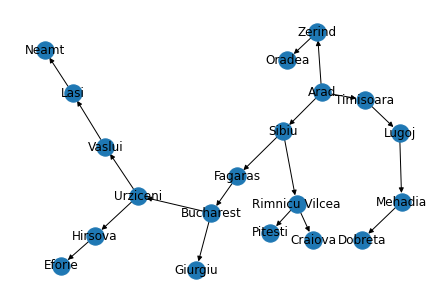

In [7]:
# Search Graph

graph = nx.bfs_tree(G, source="Arad")
pos = nx.spring_layout(G)
nx.draw(graph, pos=pos, with_labels=True)